DQN

In [1]:
import random
import torch
import numpy as np
from collections import deque
import time
import matplotlib.pyplot as plt

In [2]:
# !pip -q install requirements01.txt

In [3]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana_Windows_x86_64/Banana.exe")
# env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    #env_info = env.step(action)[brain_name]    
    env_info = env.step({brain_name: action})[brain_name]# send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [7]:
from dqn_agent import Agent
from collections import deque

agent = Agent(state_size=37, action_size=4, seed=0)

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Loop de treinamento do agente DQN."""
    scores = []                        # Lista de scores por episódio
    scores_window = deque(maxlen=100) # Média móvel dos últimos 100 episódios
    eps = eps_start                   # Valor inicial de epsilon (exploração)

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0

        for t in range(max_t):
            action = agent.act(state, eps)

            #Passar ação como lista para o brain local
            env_info = env.step({brain_name: [action]})[brain_name]

            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward

            if done:
                break

        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay * eps)

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        # if np.mean(scores_window) >= 13.0:
        #     print('\n Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
        #         i_episode, np.mean(scores_window)))
        #     torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        #     break

    return scores


In [9]:
scores = dqn()

Episode 100	Average Score: 0.94
Episode 200	Average Score: 4.60
Episode 300	Average Score: 6.71
Episode 400	Average Score: 10.99
Episode 500	Average Score: 13.47
Episode 600	Average Score: 14.40
Episode 700	Average Score: 14.05
Episode 800	Average Score: 15.67
Episode 900	Average Score: 15.07
Episode 1000	Average Score: 15.42
Episode 1100	Average Score: 16.41
Episode 1200	Average Score: 16.18
Episode 1300	Average Score: 15.74
Episode 1400	Average Score: 15.39
Episode 1500	Average Score: 15.76
Episode 1600	Average Score: 15.60
Episode 1700	Average Score: 15.02
Episode 1800	Average Score: 15.94
Episode 1900	Average Score: 16.01
Episode 2000	Average Score: 16.25


In [10]:
torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

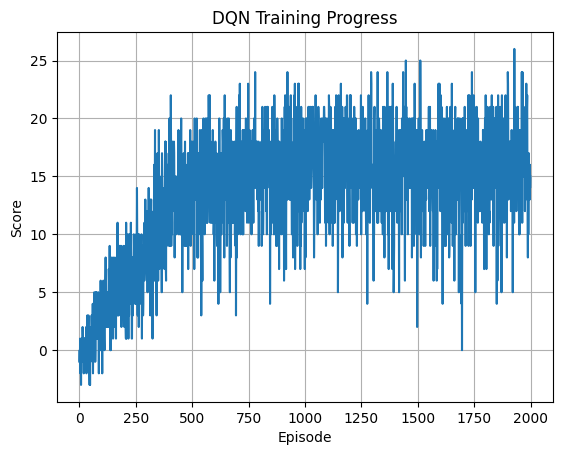

In [11]:
import matplotlib.pyplot as plt
plt.plot(scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('DQN Training Progress')
plt.grid()
plt.show()
